In [20]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.15.0'

In [21]:
a = tf.constant(10)
b = tf.constant(20)

c = a+b
d = (a+b).numpy()

print(type(c))
print(c)
print(type(d))
print(d)

d_numpy_to_tensor = tf.convert_to_tensor(d)
print(type(d_numpy_to_tensor))
print(d_numpy_to_tensor)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)
<class 'numpy.int32'>
30
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)


In [22]:
W = tf.Variable(tf.random.normal([1]))
print("inital W = ", W.numpy())
print("="*10)
for step in range(2):
    W = W +1.0
    print('step = ', step, ', w= ', W.numpy())

inital W =  [0.07675716]
step =  0 , w=  [1.0767572]
step =  1 , w=  [2.0767572]


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

In [24]:
x_data = np.array([1,2,3,4,5,6])
t_data = np.array([3,4,5,6,7,8])

In [25]:
model = Sequential()
model.add(Flatten(input_shape = (1,))) # 다차원으로 1차원으로 만들기
model.add(Dense(1,activation='linear'))
model.compile(optimizer = SGD(learning_rate = 1e-2), loss ='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
hist = model.fit(x_data, t_data , epochs=  1000)


Epoch 1/1000
1/1 [==============================] - 0s 170ms/step - loss: 6.0029
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.1344
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.8041
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.1859
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8972
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7610
Epoch 7/1000
1/1 [==============================] - 0s 350ms/step - loss: 0.6955
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6626
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6450
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6343
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6269
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6211
Epoch 13/1000
1/1 [==========================

In [27]:
y_pred = model.predict(x_data)
print(y_pred[:5])

1/1 [==============================] - 0s 49ms/step
[[2.9630032]
 [3.9742785]
 [4.9855537]
 [5.996829 ]
 [7.0081043]]


In [28]:
print(t_data[:5])

[3 4 5 6 7]


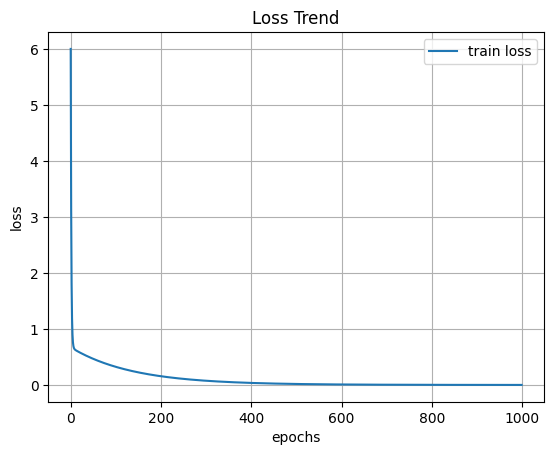

In [29]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.legend(loc = 'best')

plt.show()

In [33]:
model.save('model01.keras') #model01.h5

In [34]:
load_model = tf.keras.models.load_model('model01.keras')

In [35]:
load_model.predict(x_data)

1/1 [==============================] - 0s 62ms/step


array([[2.9630032],
       [3.9742785],
       [4.9855537],
       [5.996829 ],
       [7.0081043],
       [8.019381 ]], dtype=float32)

In [37]:
load_model.evaluate(x_data)

1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00


0.0

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd

In [40]:
loaded_data = np.loadtxt("./diabetes_nohead.csv", delimiter=',')
loaded_data.shape

(768, 9)

In [42]:
seperation_rate = 0.3
test_data_num = int(len(loaded_data) * seperation_rate)

In [44]:
np.random.shuffle(loaded_data)
test_data = loaded_data[0: test_data_num]
training_data =loaded_data[test_data_num :]
training_x_data = training_data[:, 0:-1]
training_t_data = training_data[:, [-1]]
test_x_data = test_data[:, 0:-1]
test_t_data = test_data[:, [-1]]

print("training_x_data.shpae" , training_x_data.shape)
print("training_t_data.shape", training_t_data.shape)
print("test_x_data_shape", test_x_data.shape)
print("test_t_data_shape" , test_t_data.shape)

training_x_data.shpae (538, 8)
training_t_data.shape (538, 1)
test_x_data_shape (230, 8)
test_t_data_shape (230, 1)


In [47]:
model = Sequential()
model.add(Dense(
    training_t_data.shape[1], 
    input_shape=(training_x_data.shape[1],), 
    activation='sigmoid' 
))

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
hist= model.fit(training_x_data,training_t_data, epochs= 500, validation_split= 0.2)

Epoch 1/500
14/14 [==============================] - 0s 6ms/step - loss: 25.7035 - accuracy: 0.5628 - val_loss: 6.9176 - val_accuracy: 0.7130
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 24.4480 - accuracy: 0.5884 - val_loss: 18.9869 - val_accuracy: 0.7407
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 23.5858 - accuracy: 0.5744 - val_loss: 13.1137 - val_accuracy: 0.7407
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 22.6839 - accuracy: 0.5930 - val_loss: 21.1640 - val_accuracy: 0.4537
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 26.5430 - accuracy: 0.5698 - val_loss: 32.4764 - val_accuracy: 0.2870
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 24.4407 - accuracy: 0.5977 - val_loss: 36.5774 - val_accuracy: 0.7407
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 26.4646 - accuracy: 0.5837 - val_loss: 26.8660 - val_accuracy: 0.3704


In [65]:
predict = model.predict(test_x_data)
print(predict[:3])

8/8 [==============================] - 0s 1ms/step
[[6.2257133e-18]
 [7.5583351e-24]
 [6.1814152e-02]]


In [66]:
print(test_t_data[:3])

[[0.]
 [0.]
 [1.]]


In [57]:
model.evaluate(test_x_data, test_t_data)

8/8 [==============================] - 0s 2ms/step - loss: 40.4262 - accuracy: 0.6478


[40.42620086669922, 0.647826075553894]

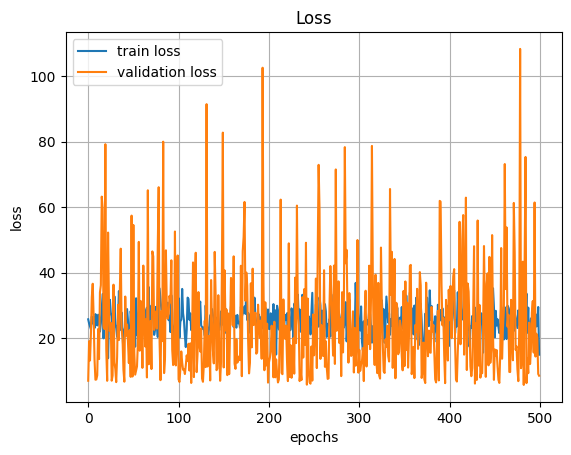

In [64]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc ='best')

plt.show()